In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.metrics import f1_score
from matplotlib.lines import Line2D


%matplotlib inline
import mpld3
mpld3.enable_notebook()

In [2]:
df_small = pd.read_csv('smallwrangled.csv', index_col=0)
df_large = pd.read_csv('largewrangled.csv', index_col=0)

df_small['pressure'] = df_small['pressure'] / 68.95
df_large['pressure'] = df_large['pressure'] / 68.95

time_small = df_small['time']
time_large = df_large['time'] #Although they are essentially the same, lets just define it.

#We will define an "exact solution array" for score calculations. This is totally by eye and the knowledge of erroneous points:
exact_array_small = [1] * df_small.shape[0]
exact_array_large = [1] * df_small.shape[0]

exact_array_small[500:514] = [-1] * (514-500)
exact_array_large[500:506] = [-1] * (506-500)



In [3]:
#LOF
lof = LocalOutlierFactor()
lof_small = lof.fit_predict(df_small)
lof_large = lof.fit_predict(df_large)
#DBSCAN
dbscan_small = DBSCAN(eps=2, min_samples = 3)
dbscan_large = DBSCAN(eps=2, min_samples = 3)
dbscan_small.fit(df_small)
dbscan_large.fit(df_large)
#OCSVM
ocsvm = OneClassSVM(kernel='linear', gamma='scale')
ocsvm_small = ocsvm.fit_predict(df_small)
ocsvm_large = ocsvm.fit_predict(df_large)
#Isolation Forest
isolation = IsolationForest(random_state=0)
isolation_small = isolation.fit_predict(df_small)
isolation_large = isolation.fit_predict(df_large)


In [59]:
f1_lof_small = round(f1_score(exact_array_small, lof_small, average='micro'), 4)
f1_lof_large = round(f1_score(exact_array_large, lof_large, average='micro'), 4)
f1_dbscan_small = round(f1_score(exact_array_small, dbscan_small.labels_, average='micro'), 4)
f1_dbscan_large = round(f1_score(exact_array_large, dbscan_large.labels_, average='micro'), 4)
f1_ocsvm_small = round(f1_score(exact_array_small, ocsvm_small, average='micro'), 4)
f1_ocsvm_large = round(f1_score(exact_array_large, ocsvm_large, average='micro'), 4)
f1_iso_small = round(f1_score(exact_array_small, isolation_small, average='micro'), 4)
f1_iso_large = round(f1_score(exact_array_large, isolation_large, average='micro'), 4)


In [71]:
labeltext_small = "F1=" + str(f1_dbscan_small)
labeltext_large = "F1=" + str(f1_dbscan_large)

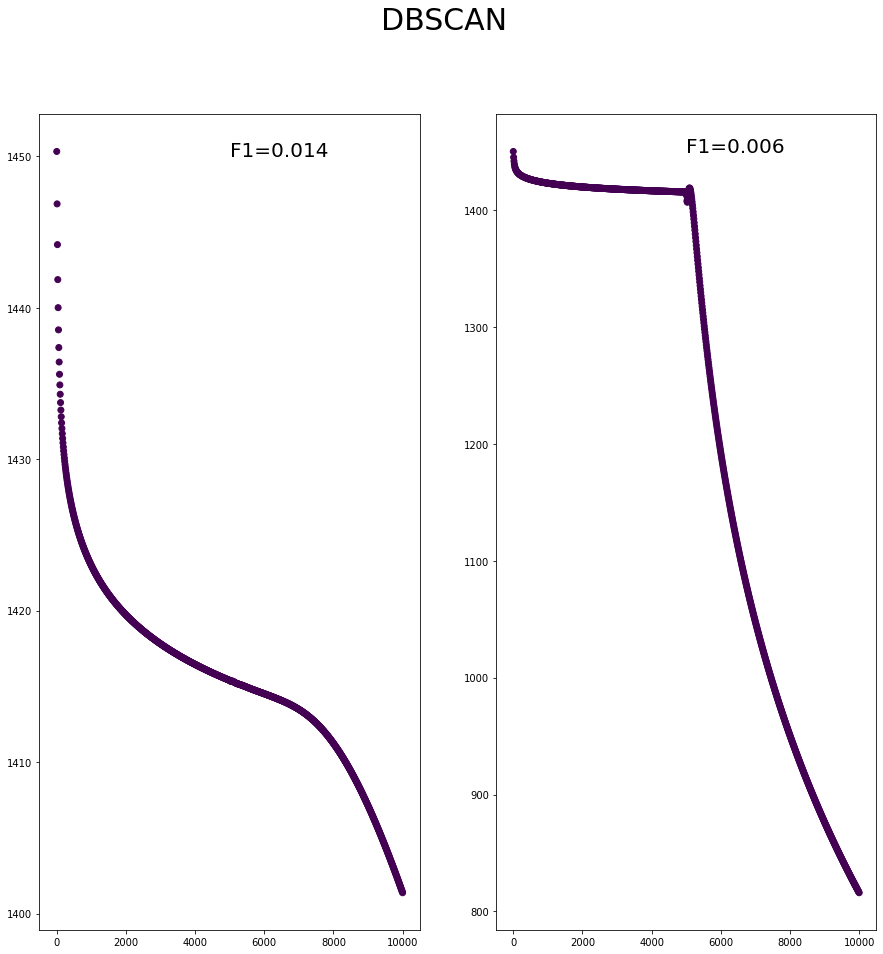

In [72]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
plt.suptitle("DBSCAN",fontsize=30)
ax1.scatter(df_small.time, df_small.pressure, c=dbscan_small.labels_)
ax2.scatter(df_large.time, df_large.pressure, c=dbscan_large.labels_)
ax1.text(5000,1450,labeltext_small, fontsize=20)
ax2.text(5000,1450,labeltext_large, fontsize=20)

plt.savefig('DBSCAN.png')

[-1 -1 -1 ... -1 -1 -1]


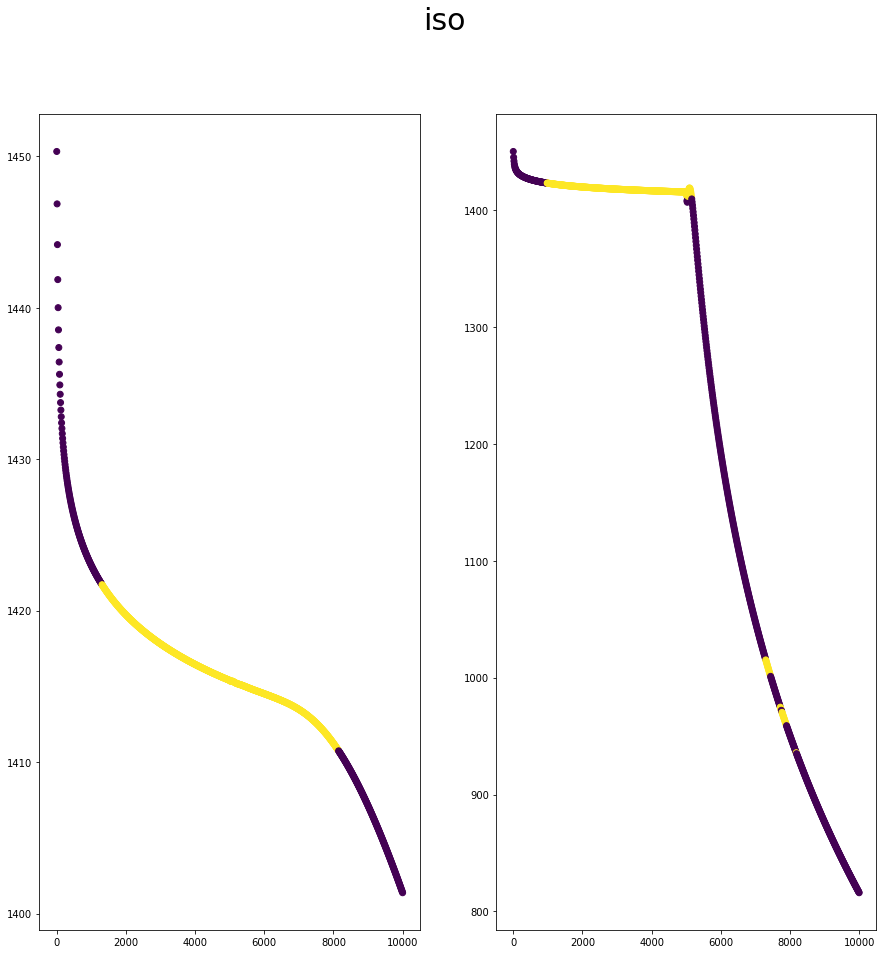

In [47]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
plt.suptitle("iso",fontsize=30)
ax1.scatter(df_small.time, df_small.pressure, c=isolation_small)
ax2.scatter(df_large.time, df_large.pressure, c=isolation_large)


print(isolation_small)